# Ejercicios Clase 1
Intro IA

Juan Pablo Nieto Uribe

In [ ]:
#Importamos Numpy
import numpy as np
import numpy.ma as ma



---


1. **Operaciones matriciales:** Dada una matriz en formato Numpy Array, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas l0, l1, l2,l-infinity, según las siguientes definiciones:

*   l0=número de elementos diferentes a cero en el vector.
* $\left \| x \right \|_{p}:=\left ( \sum_{i=1}^{n}\left | x_{i} \right |^{p} \right )^{1/p}$.
*$\left \| x \right \|_{\infty }:=max_{i}\left | x_i \right |$


In [ ]:
#Comenzamos definiendo las funciones para cada norma
def norma_l0(matriz):
  resp_norma_l0=np.count_nonzero(matriz,axis=1)
  return resp_norma_l0

def norma_l1(matriz):
  matriz=np.absolute(matriz)
  resp_norma_l1=np.sum(matriz,axis=1)
  return resp_norma_l1

def norma_l2(matriz):
  cuadrados=np.square(matriz)
  suma=np.sum(cuadrados,axis=1)
  resp_norma_l2=np.sqrt(suma)
  return resp_norma_l2

def norma_l_infninito(matriz):
  matriz=np.absolute(matriz)
  return np.amax(matriz, axis=1)

#Creamos una matriz de ejemplo 
mat_ejemplo=np.random.randint(10,size=(5,5))
print("La matriz de ejemplo es ",mat_ejemplo)

#Probamos los resultados
print('Al evaluar la norma l0, obtengo: ',norma_l0(mat_ejemplo))
print('Al evaluar la norma l1, obtengo: ',norma_l1(mat_ejemplo))
print('Al evaluar la norma l2, obtengo: ',norma_l2(mat_ejemplo))
print('Al evaluar la norma l-infinity, obtengo: ',norma_l_infninito(mat_ejemplo))

La matriz de ejemplo es  [[8 5 9 8 8]
 [5 2 4 1 4]
 [6 5 7 6 9]
 [5 9 2 2 6]
 [3 6 9 9 5]]
Al evaluar la norma l0, obtengo:  [5 5 5 5 5]
Al evaluar la norma l1, obtengo:  [38 16 33 24 32]
Al evaluar la norma l2, obtengo:  [17.2626765   7.87400787 15.06651917 12.24744871 15.23154621]
Al evaluar la norma l-infinity, obtengo:  [9 5 9 9 9]




---


2. **Sorting:** Dada una matriz en formato numpy array, donde cada fila de la matriz representa un vector matemático, se requiere computar la norma l2 de cada vector.

  Una vez obtenida la norma l2 de cada vector, se debe ordenar las normas de mayor a menor.

  Finalmente, obtener la matriz original ordenada por fila según la norma l2.

In [ ]:
#Usando el código del punto 1 para calcular la norma l2, tenemos
def norma_l2(matriz):
  cuadrados=np.square(matriz)
  suma=np.sum(cuadrados,axis=1)
  resp_norma_l2=np.sqrt(suma)
  return resp_norma_l2

#Creamos una matriz de ejemplo
mat_ejemplo_punto_2=np.random.randint(10,size=(5,5))

'''Hacemos el sorting de mayor a menor. Se presentan las normas ordenadas, aunque los valores que realmente se usan en la 
organización son sus respectivos índices'''
sort_norma_l2=np.sort(norma_l2(mat_ejemplo_punto_2))[::-1]
indices=np.argsort(norma_l2(mat_ejemplo_punto_2))[::-1]

#Finalmente, calculamos la nueva matriz organizada:
matrizOrganizada=mat_ejemplo_punto_2[indices,:]

print('La matriz random que se generó fue: ', mat_ejemplo_punto_2)
print('El array ordenado por norma l2 es: ',sort_norma_l2)
print('Los índices después de organizar son: ', indices)
print('La matriz organizada es: ',matrizOrganizada)

La matriz random que se generó fue:  [[4 1 9 0 7]
 [9 4 8 1 6]
 [0 5 8 5 8]
 [5 9 8 8 6]
 [3 2 8 9 1]]
El array ordenado por norma l2 es:  [16.43167673 14.07124728 13.34166406 12.60952021 12.12435565]
Los índices después de organizar son:  [3 1 2 4 0]
La matriz organizada es:  [[5 9 8 8 6]
 [9 4 8 1 6]
 [0 5 8 5 8]
 [3 2 8 9 1]
 [4 1 9 0 7]]




---


3. **Indexing:** Construir un índice para identificadores de usuarios.
  
  Identificadores de usuarios= users_idx=[15,12,14,10,1,2,1]
  
  Índice de usuarios=users_id=[0,1,2,3,4,5,4]

  Objetivo:Construir el id2idx e idx2id.

  Crear una clase. El índice debe construirse en el constructor. Armar métodos de instancia "get_users_id" y "get_users_idx"

In [ ]:
#Tomando que id son los valores dados para Identificadores de Usuarios, consignado en el vector indice_usuarios
#Tomando que idx son los valores de Índice de usuarios
class Usuario(object):

    def __init__(self,indices):
      self.indice=indices
      #Quitamos los duplicados, y pedimos a np que nos devuelva los índices del nuevo array sin duplicados
      self.idx2id=indices
      self.id2idx=np.unique(indices,True,True)

    def get_users_id(self,valorIdx):
      indiceResultado=np.where(self.idx2id==valorIdx)
      lenResultado=indiceResultado[0].size
      if lenResultado>0:
        return indiceResultado
      else:
        return np.array([-1])

    def get_users_idx(self,elIndice):
      nuevoIndice=np.where(self.id2idx[1]==elIndice)
      resultado=self.id2idx[0][nuevoIndice]
      return resultado

indice_usuarios=np.array([15,12,14,10,1,2,1])

#Creamos un objeto Usuario
objeto_usuario=Usuario(indice_usuarios)

#Evaluamos los resultados
#Primero los de la función id2idx
print('Primero los de la función id2idx')
print('id2idx[15] -> ',objeto_usuario.get_users_id(15)[0])
print('id2idx[12] -> ',objeto_usuario.get_users_id(12)[0])
print('id2idx[3] -> ',objeto_usuario.get_users_id(3)[0])
#Finalmente los de la función idx2id
print('Finalmente los de la función idx2id')
print('idx2id[0] -> ',objeto_usuario.get_users_idx(0))
print('idx2id[4] -> ',objeto_usuario.get_users_idx(4))


Primero los de la función id2idx
id2idx[15] ->  [0]
id2idx[12] ->  [1]
id2idx[3] ->  -1
Finalmente los de la función idx2id
idx2id[0] ->  [15]
idx2id[4] ->  [1]




---


4. **Precision, recall y accuracy:** En clasificación contamos con dos arreglos, la "verdad" y la "predicción". Cada elemento de los arreglos puede tomar dos valores, "True" (representado por 1) y "False" (representado por 0). Entonces podemos definir 4 variables:


*   True Positive (TP): La verdad es 1 y la predicción es 1.
*   True Negative (TN): La verdad es 0 y la predicción es 0.
*   False Negative (FN): La verdad es 1 y la predicción es 0.
*   False Positive (FP): La verdad es 0 y la predicción es 1.

Se definen las siguientes métricas:


*   Precision=TP/(TP+FP)
*   Recall=TP/(TP+FN)
*Accuracy=(TP+TN)/(TP+TN+FP+FN)

Suponer dos arreglos:

truth=[1,1,0,1,1,1,0,0,0,1]

Prediction=[1,1,1,1,0,0,1,1,0,0]

Calcular las tres métricas con Numpy y operaciones vectorizadas.





In [ ]:

#Definimos las métricas
def funcion_precision(tp,fp):
  arriba=tp
  abajo=tp+fp
  prec=arriba/abajo
  return prec

def funcion_recall(tp,fn):
  arriba=tp
  abajo=tp+fn
  reca=arriba/abajo
  return reca

def funcion_accuracy(tp,tn,fp,fn):
  arriba=tp+tn
  abajo=tp+tn+fp+fn
  accu=arriba/abajo
  return accu


Ahora operamos teniendo en cuenta que:



*   Al sumar los vectores truth & prediction, voy a obtener 2 en caso de un TP y 0 en caso de un TN
*   Al hacer la resta Truth-prediction voy a obtener -1 cuando tengo un falso positivo y 1 cuando tengo un falso negativo

De esta forma, puedo definir que TN es igual a la norma L0 del vector suma y TN es restarle la norma L0 a la longitud del vector suma. Por lo que puedo usar la función que definí en el punto 1 para hacer este cálculo.





In [ ]:
def norma_l0(matriz):
  resp_norma_l0=np.count_nonzero(matriz,axis=1)
  return resp_norma_l0

truth=np.array([1,1,0,1,1,1,0,0,0,1])
prediction=np.array([1,1,1,1,0,0,1,1,0,0])

truth_negativo=np.negative(truth)
suma=np.add(truth,prediction)
resta=np.add(truth_negativo,prediction)

tpArray=np.where(suma==2)
tnArray=np.where(suma==0)
fnArray=np.where(resta==1)
fpArray=np.where(resta==-1)

tp=tpArray[0].size
tn=tnArray[0].size
fn=fnArray[0].size
fp=fpArray[0].size


print('El valor de tp es: ',tpArray[0].size)
print('El valor de tn es: ',tnArray[0].size)
print('El valor de fn es: ',fnArray[0].size)
print('El valor de fp es: ',fpArray[0].size)

#Finalmente, usamos las funciones que definimos arriba para hacer los cálculos
print('-------------')
print('La precisión da: ',funcion_precision(tp,fp))
print('El Recall da: ', funcion_recall(tp,fn))
print('EL accuracy da: ',funcion_accuracy(tp,tn,fp,fn))

El valor de tp es:  3
El valor de tn es:  1
El valor de fn es:  3
El valor de fp es:  3
-------------
La precisión da:  0.5
El Recall da:  0.5
EL accuracy da:  0.4




---


5. **Average query precision:** En *information retrieval* contamos con queries "q" y para cada "q" una lista de documentos que son verdaderamente relevantes. Para evaluar search engine, es común utilizar la métrica *Average query precision*. Dado un search engine y una lista de queries "q" para evaluación, podemos obtener los siguientes resultados:


*   q_id=[1,1,1,1,2,2,2,3,3,3,3,3,4,4,4,4]
*   predicted_rank=[0,1,2,3,0,1,2,0,1,2,3,4,0,1,2,3]
*   truth_relevance=[T,F,T,F,T,T,T,F,F,F,F,F,T,F,F,T]

precision para q_id 1=2/4

precision para q_id 2=3/3

precision para q_id 3=0/5

precision para q_id 4=2/4

average query precision=((2/4)+(3/3)+(0/5)+(2/4))/4

Calcular las métricas con numpy y operaciones vectorizadas.



In [ ]:
class Aqp(object):

  def __init__(self,relevancia_query):
    self.q_id=np.array([1,1,1,1,2,2,2,3,3,3,3,3,4,4,4,4])
    #Calculo cuántos elementos hay con cada id de query
    self.unicos=np.unique(self.q_id,False,True,return_counts=True)
    
    #Convertimos a un valor numérico los valores true y los valores false. T=1 F=0
    self.true_unicos=np.unique(relevancia_query,False,True)
  
  def calcular_aqp(self):
    #Multiplicamos el vector q_id y true_unicos[1], de forma que sólo quedo con el número de true, y su respectivo id.
    identificadores=self.q_id
    verdaderos=self.true_unicos
    mult=np.multiply(identificadores,verdaderos[1])
    
    #Cuento cuántas ocurrencias hay de cada valor en el vector mult
    bincount=np.bincount(mult)

    #Quito los ceros del array, que corresponden a valores 'F'
    bincount_sin_0=np.delete(bincount,0)

    #Dividimos los dos arrays
    division=np.divide(bincount_sin_0,self.unicos[2])

    #Obtenemos la longitud del vector division
    long_div=division.size

    #Sumamos todos los elementos del array division
    suma_div=np.sum(division)

    #Calculamos el average quety precision
    average_query_precision=suma_div/long_div

    return average_query_precision

relevancia=np.array(['T','F','T','F','T','T','T','F','F','F','F','F','T','F','F','T'])

objeto_aqp=Aqp(relevancia)
print('El valor del Average Query Precision es:',objeto_aqp.calcular_aqp())

El valor del Average Query Precision es: 0.5




---


6. **Distancia a centroides:**  Dada una nube de puntos y centroides C, 
obtener las distancias entre cada vextor X y los centroides utilizando operaciones vectorizadas y broadcasting en Numpy. Utilizar como referencia los siguientes valores:



*   X=[[1,2,3],[4,5,6],[7,8,9]]
*   C=[[1,0,0],[0,1,1]]



In [ ]:
def distancia_a_centroides(X,C):
  #Dado que con broadcasting necesito que la dimensión me quede en 1, separo.
  matrices_separadas=np.vsplit(C,2)
  #Opero
  resta=x-matrices_separadas
  op=np.sqrt(np.sum(resta**2,axis=2))
  return op


x=np.array([[1,2,3], [4,5,6], [7,8,9]])
c=np.array([[1,0,0], [0,1,1]])

print('La distancia a los centroides es:',distancia_a_centroides(x,c))

La distancia a los centroides es: [[ 3.60555128  8.36660027 13.45362405]
 [ 2.44948974  7.54983444 12.72792206]]




---



7. **Enunciado:**  Obtener para cada fila en X, el índice de la fila en C con distancia euclídea más pequeña. Es decir, para cada fila en X a qué cluster pertenece en C. Por ejemplo, si el resultado anterior fue:

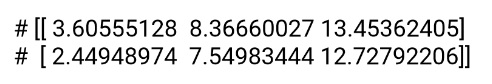

El programa debería devolver [1,1,1]

Hint:Utilizar np.argmin

In [ ]:
def el_cluster(respuesa_punto_6):
  pertenece_a=np.argmin(respuesa_punto_6,axis=0)
  return pertenece_a

resp_anrerior=np.array([[3.60555128,8.36660027,13.45362405],[ 2.44948974,7.5498344,12.72792206]])


print('Esta respuesta pertenece a:', el_cluster(resp_anrerior))

Esta respuesta pertenece a: [1 1 1]




---



8. **Implementación básica de K-Means en Numpy**  K-Means es uno de los algoritmos más básicos de Machine Learning no supervisado. Es un algoritmo de clusterización, que agrupa los datos que comparten características similates. Recordemos que entendemos datos como n realizaciones del vector aleatorio X.

El algoritmo K-means funciona de la siguiente manera:



1.   El usuario selecciona la cantidad de clusters a crear (n).
2.   Se seleccionan n elementos aleatorios de X como posiciones iniciales de los centroides C.
3. Se calcula la distancia entre todos los puntos en X y todos los puntos en C.
4. Para cada punto en X se selecciona el centroide más cercano de C.
5. Se recalculan los centroides C a partir de usar las filas X que pertenecen a cada centroide.
6. Se itera entre 3 y 5 una cantidad fija de veces o hasta que la posición de los centroides no cambie.

Implementar la función def k_means(X,n) de manera tal que al finalizar, devuelva la posición de los centroides y a qué cluster pertenece cada fila de X.

Hint: Para (2) utilizar funciones de np.random, para (3) y (4) usar los ejercicios anteriores. Para (5) es válido utilizar un for. Iterar 10 veces entre (3) y (5).



In [ ]:
def k_means(X,n,tam):
  #Indicamos el número de iteraciones
  iteraciones=10
  #2. Se calculan n elementos aleatorios de X como posiciones iniciales de los centroides C.
  primeros_centroides_indice=np.random.randint(tam, size=n)
  centroides=X[primeros_centroides_indice,:]
  #Calculamos la distancias entre los puntos de X y los centroides
  for i in range(0,iteraciones-1):
    distancias=calcularDistancias(X,centroides,n)
    asignacion_centroides=asignarCentroide(distancias,centroides,X)
  return centroides

#Creamos una función muy parecida a la del punto 6 que nos calcule la distancia entre los puntos y sus respectivos centroides
def calcularDistancias(X,C,n):
  matrics_separadas=np.split(C,n)
  #Opero
  resta=X-matrics_separadas
  op=np.sqrt(np.sum(resta**2,axis=2))
  return op

#4. Para cada punto en X se selecciona el centroide más cercano de C.
def asignarCentroide(matriz_de_distancias, C,X):
  minimaDistancia=np.amin(matriz_de_distancias,axis=0)
  indices=np.where(matriz_de_distancias==minimaDistancia)[0][:]
  return indices

#1. El usuario selecciona la cantidad de clusters que se quiere crear
clusters=5
#Dejo la opción abierta para que lo seleccione como input
#clusters=input()

#Generamos el Dataset
tamanio_del_dataset=50
points = np.random.randn(tamanio_del_dataset, 2)

#--------------
#Llamo a la función k-means
k_means(points,clusters,tamanio_del_dataset)

array([[-0.52484623,  0.21017971],
       [-0.8228997 , -1.01860283],
       [-0.69955265, -1.80002187],
       [-0.02250486, -1.11268128],
       [-0.36725044, -0.57015443]])

9. **Computar todas las métricas con call:** En problemas de machine Learning, es muy común que para cada predicción que obtenemos en nuestro dataset de verificación y evaluación, almacenemos en arreglos de numpy array el resultado de dicha predicción, junto con el valor verdadero y parámetros auxiliares (como el ranking de la predicción y el query id).

  Luego de obtener todas las predicciones, podemos utilizar la información almacenada en los arreglos de numpy, para calcular todas las métricas que queremos medir en nuestro sistema.

  Una buena práctica para implementar esto en python es crear clases que hereden de una clase Metric "base" y que cada métrica implemente el método call.

  Utilizar herencia, operador call, kwargs, para escribir un programa que permita calcular todas las métricas de los ejercicios anteriores mediante un for. Cuál es la ventaja de resolver el problema utilizando estas herramientas?